In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# load data
data = pd.read_csv("AirPassengers.csv")

In [4]:
# check data
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# change the Month to datetime and set it as index
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


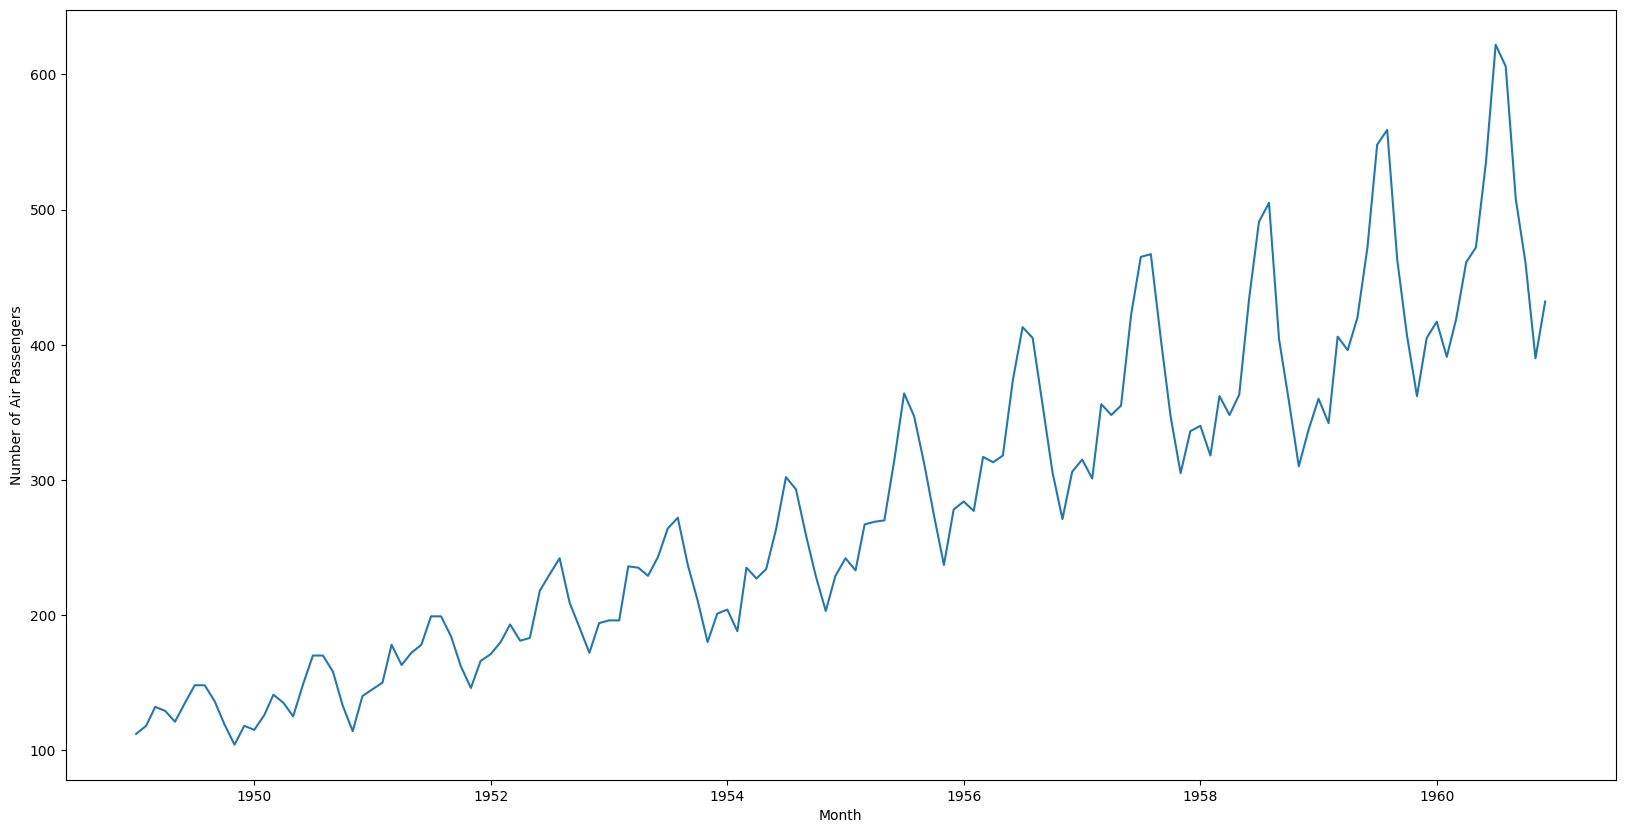

In [6]:
# make a plot of this
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

# Log Transformation

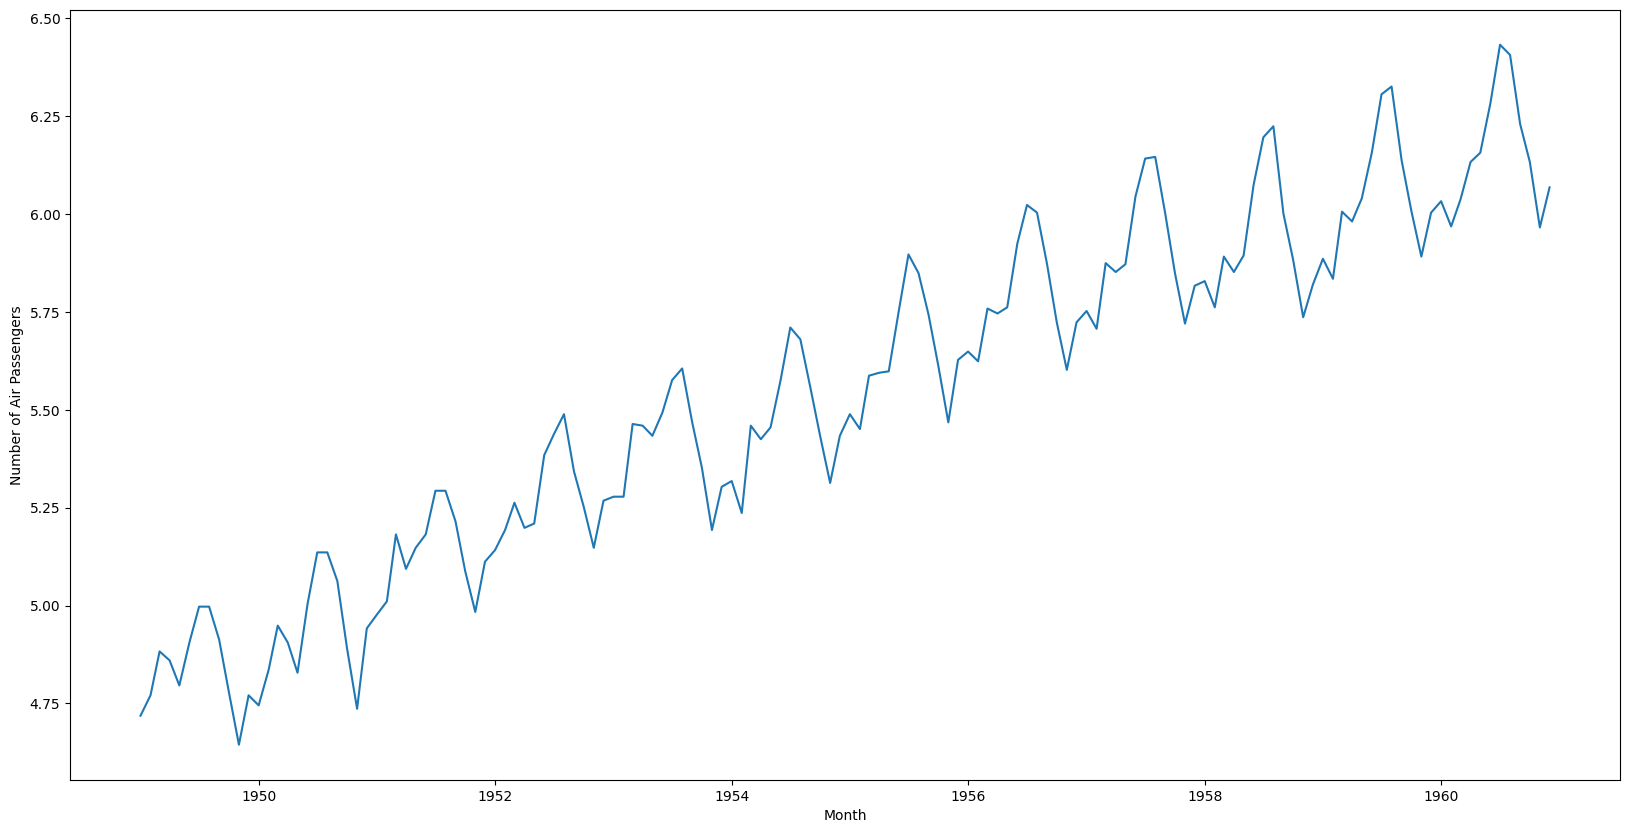

In [7]:
# make a plot of log data
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(np.log(data))

In [8]:
log_data = np.log(data)

# Log Difference - to remove trend from the data

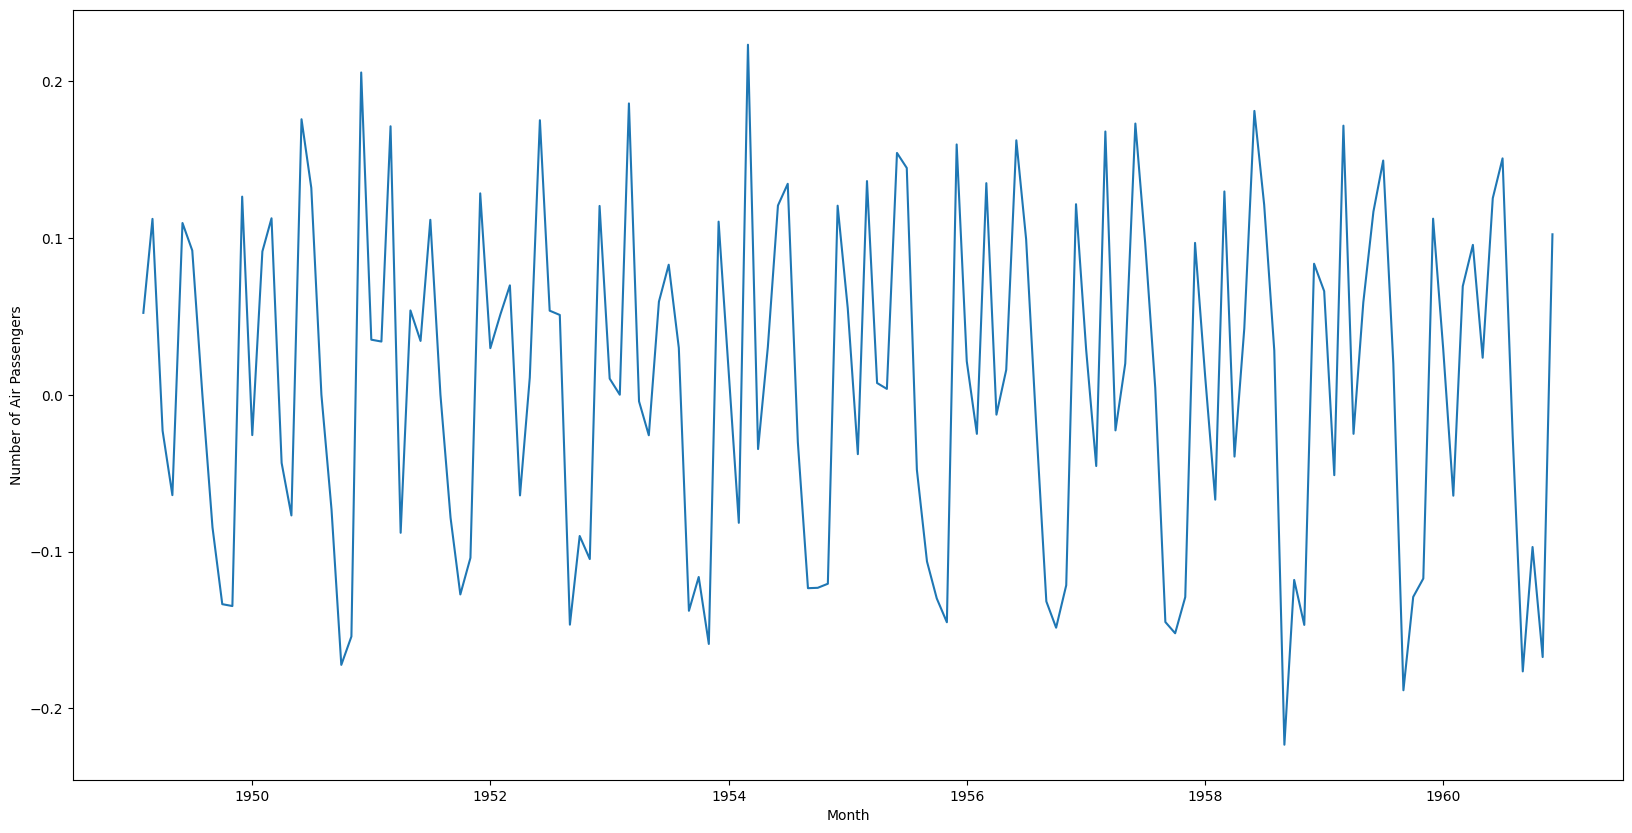

In [9]:
# make a plot of this
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(log_data.diff())

# ARIMA

In [10]:
train = log_data.iloc[:int(len(log_data)*0.8)]
test = log_data.iloc[int(len(log_data)*0.8):]

In [11]:
order = (2,2,2)#P, D ,Q
model = ARIMA(train, order=order)
model_fit = model.fit()
yhat = model_fit.forecast(steps=len(test))

D:\packages\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\packages\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\packages\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\packages\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


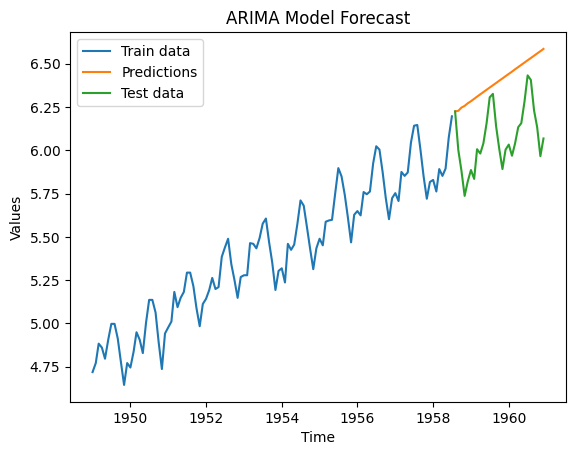

In [12]:
plt.plot(train, label='Train data')
plt.plot(yhat, label='Predictions')
plt.plot(test, label='Test data')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('ARIMA Model Forecast')
plt.legend()

# Show plot
plt.show()